In [1]:
%load_ext autoreload
%autoreload 2

import torch
from torch import nn
from torch.utils.data import DataLoader
from torchvision.datasets import MNIST
from torchvision.transforms import transforms

import numpy as np
import matplotlib.pyplot as plt

import time

In [2]:
# download mnist_dataset to desired directory and split to train, val, test
from make_modular.configs import TRAIN_DATASET_PATH, TEST_DATASET_PATH
from torch.utils.data import random_split

transform = transforms.Compose([
    transforms.ToTensor(),
    transforms.Normalize((0.5,), (0.5,))
])

train_ds = MNIST(TRAIN_DATASET_PATH, train=True, download=True, transform=transform)
test_ds = MNIST(TEST_DATASET_PATH, train=False, download=True, transform=transform)

# split train_dataset to train and validation dataset
val_percent = .10
val_size = int(val_percent * len(train_ds))
train_size = len(train_ds) - val_size

train_ds, val_ds = random_split(train_ds, [train_size, val_size])

In [3]:
# test our datasets
len(train_ds), len(val_ds), len(test_ds)

(54000, 6000, 10000)

In [4]:
# make dataLoaders 
from make_modular.configs import batch_size

train_dl = DataLoader(train_ds, batch_size=batch_size, shuffle=True)
val_dl = DataLoader(val_ds, batch_size=batch_size, shuffle=True)
test_dl = DataLoader(test_ds, batch_size=batch_size, shuffle=True)

In [5]:
# test dataloaders
images, labels = next(iter(train_dl))

In [6]:
# convert image_tesnsor: (b, c, h, w) --> numpy_array: (b, h, w, c)=(b, 28, 28, 1)
# img = images.numpy().transpose(0, 2, 3, 1)
# plt.imshow(img[0])

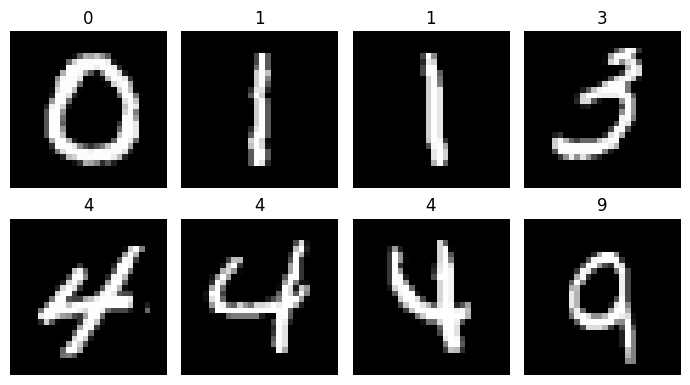

In [7]:
# show some images of dataset
from make_modular.utils import show_images
show_images(images, labels)

In [8]:
# test lrs to feed to find_best_lr func
lrs = 10 ** (np.linspace(start=-4, stop=-2, num=8))
lrs

array([0.0001    , 0.00019307, 0.00037276, 0.00071969, 0.0013895 ,
       0.0026827 , 0.00517947, 0.01      ])

Iteration 1:8
Lr  :  0.0001
epoch 1/5 | train_loss:2.27 | val_loss:2.21 | train_f1_score:0.124 | val_f1_score:0.204
epoch 2/5 | train_loss:2.17 | val_loss:2.12 | train_f1_score:0.283 | val_f1_score:0.426
epoch 3/5 | train_loss:2.08 | val_loss:2.02 | train_f1_score:0.416 | val_f1_score:0.536
epoch 4/5 | train_loss:1.99 | val_loss:1.92 | train_f1_score:0.506 | val_f1_score:0.623


epoch 5/5 | train_loss:1.88 | val_loss:1.80 | train_f1_score:0.564 | val_f1_score:0.688


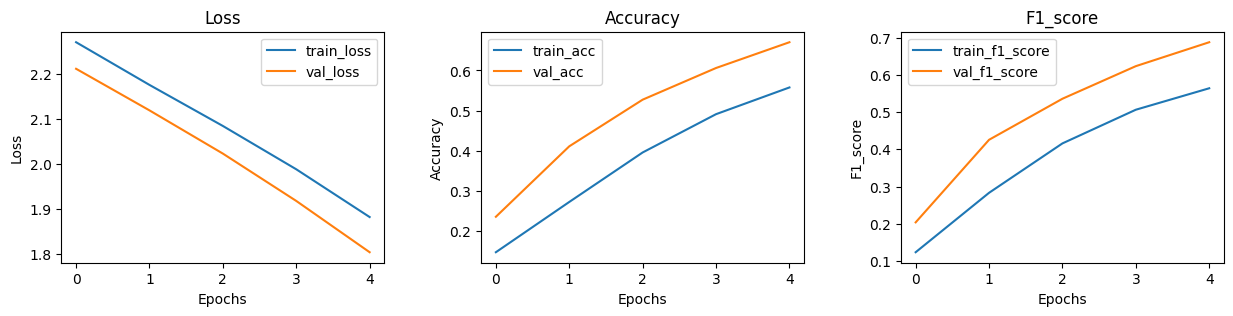

------------------------------------------------------------------------------------------------------------------------
Iteration 2:8
Lr  :  0.00019306977288832496
epoch 1/5 | train_loss:2.25 | val_loss:2.16 | train_f1_score:0.200 | val_f1_score:0.384
epoch 2/5 | train_loss:2.08 | val_loss:1.98 | train_f1_score:0.415 | val_f1_score:0.583
epoch 3/5 | train_loss:1.89 | val_loss:1.77 | train_f1_score:0.546 | val_f1_score:0.687
epoch 4/5 | train_loss:1.67 | val_loss:1.51 | train_f1_score:0.628 | val_f1_score:0.749
epoch 5/5 | train_loss:1.43 | val_loss:1.27 | train_f1_score:0.682 | val_f1_score:0.802


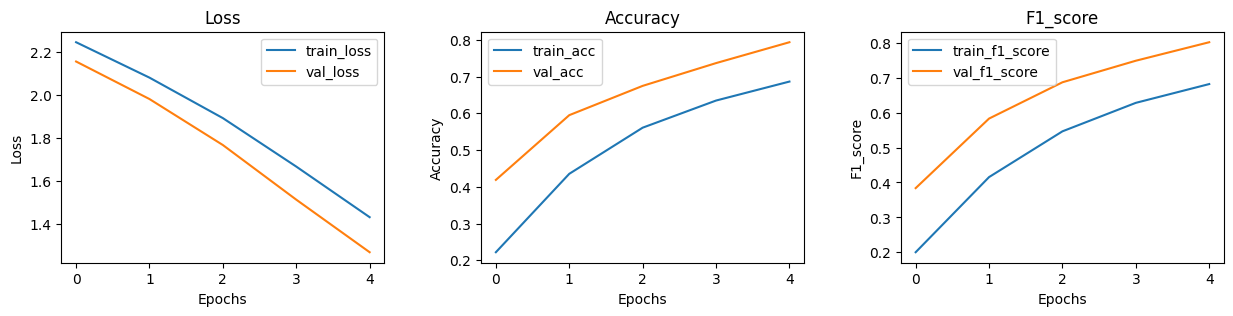

------------------------------------------------------------------------------------------------------------------------
Iteration 3:8
Lr  :  0.0003727593720314938
epoch 1/5 | train_loss:2.13 | val_loss:1.94 | train_f1_score:0.364 | val_f1_score:0.696
epoch 2/5 | train_loss:1.75 | val_loss:1.48 | train_f1_score:0.647 | val_f1_score:0.811
epoch 3/5 | train_loss:1.28 | val_loss:1.01 | train_f1_score:0.750 | val_f1_score:0.859
epoch 4/5 | train_loss:0.91 | val_loss:0.70 | train_f1_score:0.808 | val_f1_score:0.882
epoch 5/5 | train_loss:0.69 | val_loss:0.53 | train_f1_score:0.839 | val_f1_score:0.898


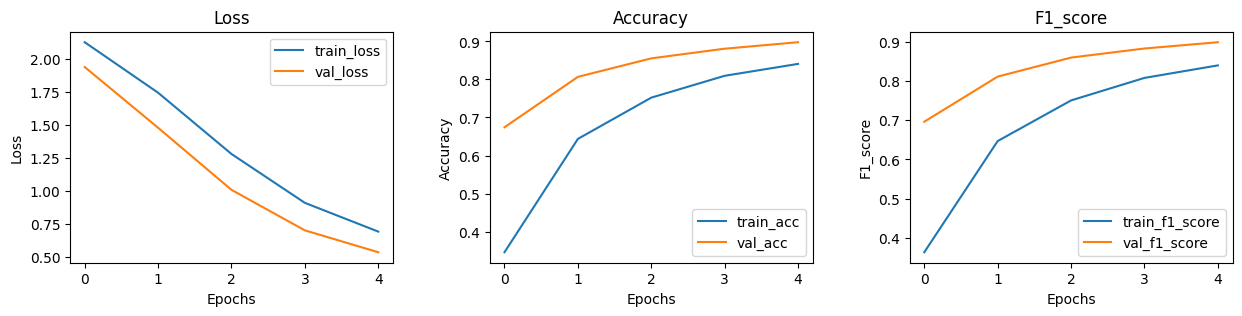

------------------------------------------------------------------------------------------------------------------------
Iteration 4:8
Lr  :  0.0007196856730011522
epoch 1/5 | train_loss:1.90 | val_loss:1.39 | train_f1_score:0.466 | val_f1_score:0.776
epoch 2/5 | train_loss:1.05 | val_loss:0.70 | train_f1_score:0.752 | val_f1_score:0.863
epoch 3/5 | train_loss:0.65 | val_loss:0.47 | train_f1_score:0.828 | val_f1_score:0.894
epoch 4/5 | train_loss:0.49 | val_loss:0.37 | train_f1_score:0.866 | val_f1_score:0.910
epoch 5/5 | train_loss:0.41 | val_loss:0.31 | train_f1_score:0.885 | val_f1_score:0.920


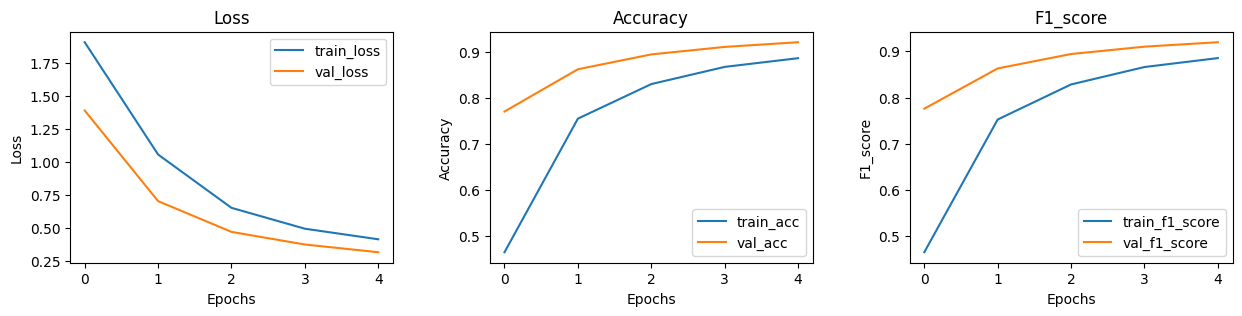

------------------------------------------------------------------------------------------------------------------------
Iteration 5:8
Lr  :  0.0013894954943731374
epoch 1/5 | train_loss:1.46 | val_loss:0.68 | train_f1_score:0.633 | val_f1_score:0.874
epoch 2/5 | train_loss:0.54 | val_loss:0.34 | train_f1_score:0.861 | val_f1_score:0.922
epoch 3/5 | train_loss:0.35 | val_loss:0.26 | train_f1_score:0.903 | val_f1_score:0.935


In [9]:
# find best lr
from make_modular.model import MNIST_MODEL_7
from make_modular.utils import print_train_time
from make_modular.utils import find_best_lr
from pprint import pprint

# define lr list if we don't want to find it randomly
lrs = 10 ** (np.linspace(start=-4, stop=-2, num=8))

start_time = time.time()
lr_exp_list = find_best_lr(model_class=MNIST_MODEL_7, 
                           epochs_per_lr=5, 
                           train_dl=train_dl, 
                           val_dl=val_dl,
                           lr_list=lrs)
end_time = time.time()
total_time = print_train_time(start_time, end_time)

# best lr in list associated with val_loss
best_lr = min(lr_exp_list, key=lambda x: x[list(x.keys())[0]]['val_loss'][-1])
# pprint(f'best_lr : {best_lr}')

lrs = [] # key of dict:the lr
losses_correspond_lr = [] # the test_loss with correspond lr

for dictionary in lr_exp_list:
    min_test_loss_key = min(dictionary, key=lambda k: dictionary[k]['val_loss'][-1])
    lrs.append(min_test_loss_key)
    losses_correspond_lr.append(dictionary[min_test_loss_key]['val_loss'][-1])

In [9]:
# pprint(lr_exp_list)
# pprint(f'best_lr : {best_lr}')

In [10]:
# final_res_lr = []

In [ ]:
# final train with best lr 

from make_modular.engine import train
from make_modular.configs import device
from make_modular.utils import print_train_time
from make_modular.model import MNIST_MODEL_7

model = MNIST_MODEL_7()

lr = 2e-2
epochs = 17
project_name = 'MNIST'
experiment_name = f'{model.__class__.__name__}, lr:{lr}'

optimizer = torch.optim.SGD(params=model.parameters(), lr=lr)
loss_fn = nn.CrossEntropyLoss()

# configs to save for wandb
hp_configs = {
    'model':model.__class__.__name__,
    'lr':lr,
    'epochs':epochs,
    'device':device
}

start_time = time.time()
results = train(model=model,
                train_dl=train_dl,
                val_dl=val_dl,
                loss_fn=loss_fn,
                optimizer=optimizer,
                device=device,
                epochs=epochs,
                save_wandb=True,
                project_name=project_name,
                experiment_name=experiment_name,
                hyper_param_config=hp_configs)

# final_res_lr.append({lr:results})
end_time = time.time()
total_time = print_train_time(start_time, end_time)

epoch 1/22 | train_loss:1.03 | val_loss:0.28 | train_f1_score:0.709 | val_f1_score:0.921


epoch 2/22 | train_loss:0.26 | val_loss:0.15 | train_f1_score:0.923 | val_f1_score:0.956
epoch 3/22 | train_loss:0.17 | val_loss:0.11 | train_f1_score:0.951 | val_f1_score:0.969
epoch 4/22 | train_loss:0.13 | val_loss:0.09 | train_f1_score:0.962 | val_f1_score:0.974
epoch 5/22 | train_loss:0.11 | val_loss:0.08 | train_f1_score:0.968 | val_f1_score:0.979
epoch 6/22 | train_loss:0.09 | val_loss:0.07 | train_f1_score:0.972 | val_f1_score:0.978
epoch 7/22 | train_loss:0.08 | val_loss:0.07 | train_f1_score:0.974 | val_f1_score:0.981
epoch 8/22 | train_loss:0.08 | val_loss:0.06 | train_f1_score:0.977 | val_f1_score:0.983
epoch 9/22 | train_loss:0.07 | val_loss:0.06 | train_f1_score:0.978 | val_f1_score:0.984
epoch 10/22 | train_loss:0.07 | val_loss:0.05 | train_f1_score:0.980 | val_f1_score:0.983
epoch 11/22 | train_loss:0.06 | val_loss:0.05 | train_f1_score:0.982 | val_f1_score:0.983
epoch 12/22 | train_loss:0.06 | val_loss:0.05 | train_f1_score:0.983 | val_f1_score:0.984
epoch 13/22 | trai

train_acc,▁▆▇▇▇█████████████████
train_f1_score,▁▆▇▇▇█████████████████
train_loss,█▃▂▂▂▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁
val_acc,▁▅▆▇▇▇▇▇██████████████
val_f1_score,▁▅▆▇▇▇▇███████████████
val_loss,█▄▃▂▂▂▂▂▁▁▁▁▁▁▁▁▁▁▁▁▁▁
train_acc,0.98894
train_f1_score,0.9887
train_loss,0.03631
val_acc,0.98568
val_f1_score,0.98603



Train time: 3.068 minutes


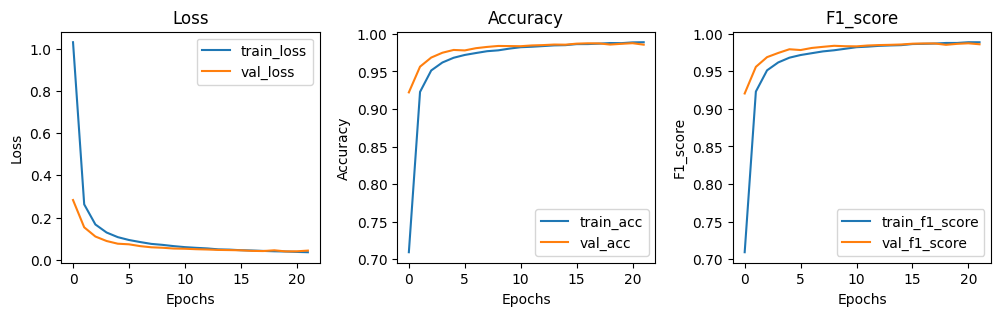

In [ ]:
from make_modular.utils import plot_loss_curves
plot_loss_curves(results=results)

In [ ]:
# save the model
import os

root_model_path = '/teamspace/studios/this_studio/Prob_2/model'
# model_name = 'mn_model_1.pth'
# model_name = 'mn_model_2.pth'
# model_name = 'mn_model_3.pth'
# model_name = 'mn_model_4.pth'
# model_name = 'mn_model_5.pth'
model_name = 'mn_model_6.pth'
model_path = os.path.join(root_model_path ,model_name)
torch.save(model.state_dict(), model_path)

In [ ]:
# load the model
model = MNIST_MODEL_1()
model.load_state_dict(torch.load(model_path))

<All keys matched successfully>

In [ ]:
# results

In [ ]:
# test model on test set
from make_modular.engine import test_one_epoch
test_loss, test_acc, test_f1_score = test_one_epoch(model=model,
                                                    val_dl=test_dl,
                                                    loss_fn=loss_fn,
                                                    device=device)
test_loss, test_acc, test_f1_score

(0.048629526332151264, 0.9835788216560509, 0.9813751644501306)

In [ ]:
# find best lr for models